# Q2- MohammadReza Zarei 401201313

In [2]:
import numpy as np
import pandas as pd



from matplotlib import pyplot as plt
from matplotlib import figure
import seaborn as sns
import datetime
import torch.nn as nn
from itertools import product, combinations
from collections import Counter
import
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=10000)
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv("./international_matches.csv")
newdf = df.fillna(0)

In [4]:
newdf = newdf.replace({"Costarica": "Costa Rica", "Korea Republic": "South Korea"})

In [35]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
newdf.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
newdf.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,1,UEFA Nations League,Łódź,Poland,True,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,2,UEFA Nations League,Zenica,Bosnia and Herzegovina,False,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,3,UEFA Nations League,Bucharest,Romania,False,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,2,UEFA Nations League,Luxembourg,Luxembourg,False,No,Draw,69.0,0.0,68.5,0.0,69.8,0.0,0.0,0.0
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,0,UEFA Nations League,İzmir,Turkey,False,No,Win,79.0,71.0,78.2,76.7,78.2,0.0,0.0,0.0
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,1,UEFA Nations League,Chișinău,Moldova,False,No,Win,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,No,Lose,0.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,0,Kirin Cup,Suita,Japan,True,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,3,Kirin Cup,Suita,Japan,False,No,Lose,73.0,0.0,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,South Korea,Egypt,Asia,Africa,29,32,1519,1500,4,1,Friendly,Seoul,South Korea,False,No,Win,75.0,0.0,73.0,80.0,73.8,0.0,79.3,70.8


In [37]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score',
       'Binary', 'home_won', 'total_score_home_team', 'total_score_away_team',
       'point_diff', 'team_diff', 'rank_diff', 'avg_rank_diff'],
      dtype='object')

In [8]:
df["date"] = pd.to_datetime(df["date"])

In [9]:
df["Binary"] = np.where(df["home_team_result"] == "Win", 1, 0)

In [10]:
tabcorr = df.corr()
tabcorr

C:\Users\MohammadReza\AppData\Local\Temp\ipykernel_13700\2859754406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tabcorr = df.corr()


,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,neutral_location,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,Binary
home_team_fifa_rank,1.000000,0.496644,-0.177332,-0.061516,-0.127667,0.219087,0.026064,-0.640102,-0.210219,-0.712681,-0.706093,-0.736180,-0.197999,-0.219993,-0.219073,-0.174360
away_team_fifa_rank,0.496644,1.000000,-0.045389,-0.158492,0.298982,-0.158206,0.034015,-0.248486,-0.626912,-0.241540,-0.254718,-0.256242,-0.698827,-0.703529,-0.730467,0.245071
home_team_total_fifa_points,-0.177332,-0.045389,1.000000,0.923608,0.018280,-0.045954,0.014227,0.202064,0.110484,0.200774,0.160734,0.213823,0.070885,-0.003438,0.072898,0.034307
away_team_total_fifa_points,-0.061516,-0.158492,0.923608,1.000000,-0.073670,0.044622,0.010146,0.109012,0.214212,0.095147,0.057744,0.103302,0.181379,0.107349,0.189590,-0.062838
home_team_score,-0.127667,0.298982,0.018280,-0.073670,1.000000,-0.171268,-0.051037,0.110092,-0.156870,0.135689,0.139203,0.142802,-0.159974,-0.142025,-0.149705,0.611523
away_team_score,0.219087,-0.158206,-0.045954,0.044622,-0.171268,1.000000,0.093234,-0.082294,0.165525,-0.082411,-0.088926,-0.084401,0.161526,0.171400,0.178541,-0.484280
neutral_location,0.026064,0.034015,0.014227,0.010146,-0.051037,0.093234,1.000000,-0.016036,-0.038887,0.020085,0.040003,-0.000917,-0.019329,-0.007676,-0.019221,-0.065329
home_team_goalkeeper_score,-0.640102,-0.248486,0.202064,0.109012,0.110092,-0.082294,-0.016036,1.000000,0.183310,0.709909,0.606479,0.675313,0.170853,0.162261,0.175306,0.118451
away_team_goalkeeper_score,-0.210219,-0.626912,0.110484,0.214212,-0.156870,0.165525,-0.038887,0.183310,1.000000,0.163079,0.153481,0.151401,0.693181,0.586533,0.662816,-0.170633
home_team_mean_defense_score,-0.712681,-0.241540,0.200774,0.095147,0.135689,-0.082411,0.020085,0.709909,0.163079,1.000000,0.807094,0.843612,0.171837,0.170735,0.185069,0.127435


<AxesSubplot: >

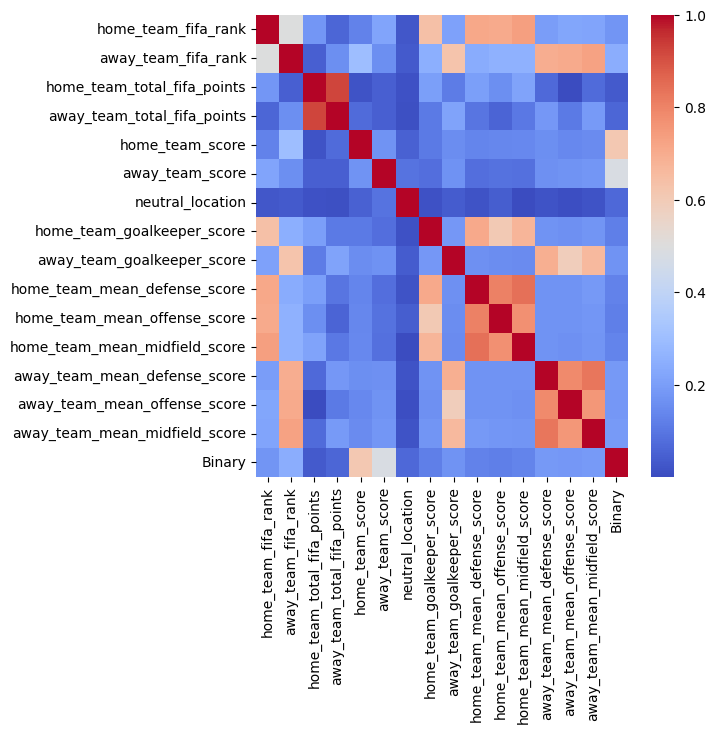

In [32]:
plt.figure(figsize=(6,6))
sns.heatmap(abs(tabcorr), cmap="coolwarm")

In [33]:
correlations = tabcorr.Binary
print(correlations)

home_team_fifa_rank             -0.174360
away_team_fifa_rank              0.245071
home_team_total_fifa_points      0.034307
away_team_total_fifa_points     -0.062838
home_team_score                  0.611523
away_team_score                 -0.484280
neutral_location                -0.065329
home_team_goalkeeper_score       0.118451
away_team_goalkeeper_score      -0.170633
home_team_mean_defense_score     0.127435
home_team_mean_offense_score     0.121533
home_team_mean_midfield_score    0.129956
away_team_mean_defense_score    -0.186455
away_team_mean_offense_score    -0.183241
away_team_mean_midfield_score   -0.190876
Binary                           1.000000
Name: Binary, dtype: float64


In [34]:
df["home_won"] = (df["home_team_score"] - df["away_team_score"]) > 0
df["total_score_home_team"] = (0.118451*newdf["home_team_goalkeeper_score"] + 0.127435*newdf["home_team_mean_defense_score"] + 0.121533*newdf["home_team_mean_midfield_score"] + 0.129956*newdf["home_team_mean_offense_score"])/(0.118451 + 0.127435 + 0.121533 + 0.129956)
df["total_score_away_team"] = (0.170633*newdf["away_team_goalkeeper_score"] + 0.186455*newdf["away_team_mean_defense_score"] + 0.183241*newdf["away_team_mean_midfield_score"] + 0.190876*newdf["away_team_mean_offense_score"])/(0.170633 + 0.186455 + 0.183241 + 0.190876)
df["point_diff"] = df["home_team_total_fifa_points"] - df["away_team_total_fifa_points"]
df["team_diff"] = df["total_score_home_team"] - df["total_score_away_team"]
df["rank_diff"] = df["home_team_fifa_rank"] - df["away_team_fifa_rank"]
df["avg_rank_diff"] = (df["home_team_fifa_rank"]+df["away_team_fifa_rank"])/2

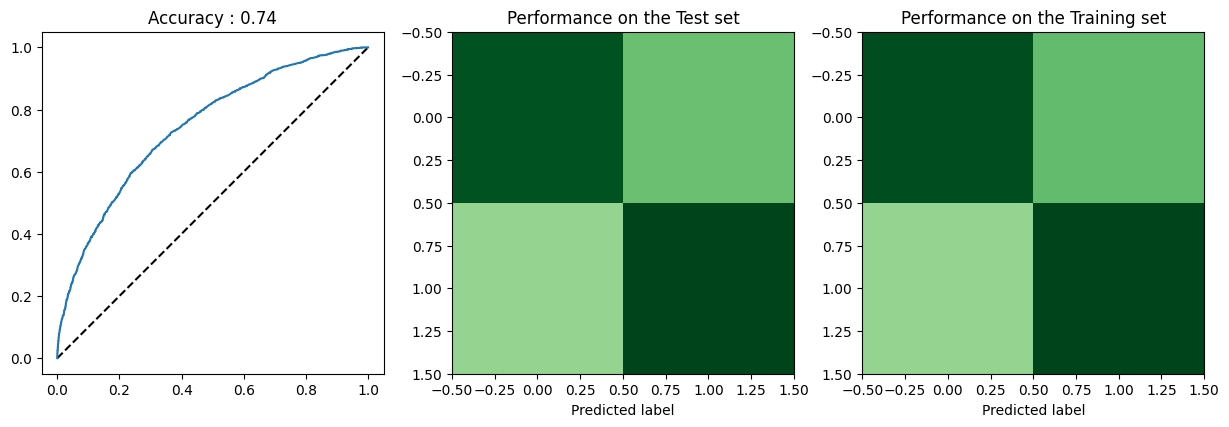

In [31]:
#X, y = df.loc[:,["team_diff","avg_rank_diff","rank_diff", "point_diff"]], df["home_won"]
X, y = df.loc[:,["rank_diff", "point_diff"]], df["home_won"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

logreg = linear_model.LogisticRegression(C = 1e-5)
features = PolynomialFeatures(degree = 2)
model = Pipeline([("polynomial_features", features),("logistic_regression", logreg)])
model = model.fit(X_train, y_train)

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title("Accuracy : {0:0.2}" .format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(y_test, model.predict(X_test))
ax.imshow(cm, cmap="Greens", clim = (0, cm.max())) 
ax.set_xlabel('Predicted label')
ax.set_title("Performance on the Test set")

ax = plt.subplot(1,3,3)
cm = confusion_matrix(y_train, model.predict(X_train))
ax.imshow(cm, cmap="Greens", clim = (0, cm.max())) 
ax.set_title("Training set")
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')
pass

In [15]:
##### load teams in Worldcup 2022
matches = pd.read_csv("./Groupes - V3.csv")
matches = matches.loc[:, ["team", "groups", "First match against", "Second match against", "Third match against"]]
matches = matches.set_index("team")
matches.head()

,groups,First match against,Second match against,Third match against
team,,,,
Qatar,A,Ecuador,Senegal,Netherlands
Ecuador,A,Qatar,Netherlands,Senegal
Senegal,A,Netherlands,Qatar,Ecuador
Netherlands,A,Senegal,Ecuador,Qatar
England,B,Iran,USA,Wales


In [16]:
teams = ["Qatar", "Ecuador", "Senegal", "Netherlands", "England", "Iran", "USA", "Wales", "Argentina", "Saudi Arabia", "Mexico", "Poland", "France", "Australia", "Denmark", "Tunisia", "Spain", "Costa Rica", "Germany", "Japan", "Belgium", "Canada", "Morocco", "Croatia", "Brazil", "Serbia", "Switzerland", "Cameroon", "Portugal", "Ghana", "Uruguay", "South Korea"]

world_cup_rankings_home = newdf[["home_team","home_team_fifa_rank","home_team_total_fifa_points"]].loc[newdf["home_team"].isin(teams) & (newdf["date"]>"2021-01-01")]
world_cup_rankings_away = newdf[["away_team","away_team_fifa_rank","away_team_total_fifa_points"]].loc[newdf["away_team"].isin(teams) & (newdf["date"]>"2021-01-01")]

world_cup_rankings_home = world_cup_rankings_home.groupby("home_team").mean()
world_cup_rankings_away = world_cup_rankings_away.groupby("away_team").mean()

In [17]:
round_of_16 = list()
quarterfinals = list()
semifinals = list()
finals = list()

results_round_of_16 = list()
results_quarterfinals = list()
results_semifinals = list()
results_finals = list()

simulations = 1000

for i in range(simulations):
    matches["total_prob"] = 0
    matches["points"] = 0
    try:
        matches.set_index('team',inplace=True)
    except:
        pass

    for groups in set(matches["groups"]):
        lista_combinacoes = list(combinations(matches.query('groups == "{}"'.format(groups)).index, 2))
        for home, away in lista_combinacoes:
            home_p = home
            away_p = away
            
            #row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
            row = pd.DataFrame(np.array([[np.nan, True]]), columns=X_test.columns) 
            home_rank = world_cup_rankings_home.loc[home_p, "home_team_fifa_rank"]
            home_points = world_cup_rankings_home.loc[home_p, "home_team_total_fifa_points"]
            away_rank = world_cup_rankings_away.loc[away_p, "away_team_fifa_rank"]
            away_points = world_cup_rankings_away.loc[away_p, "away_team_total_fifa_points"]
            
            #row["avg_rank_diff"] = (home_rank + away_rank)/2
            row["rank_diff"] = home_rank - away_rank
            row["point_diff"] = home_points - away_points
        
            home_win_prob = model.predict_proba(row)[:,1][0]
            home_win_prob = np.random.binomial(1, home_win_prob)
            
            matches.loc[home_p, "total_prob"] = matches.loc[home_p, "total_prob"] + home_win_prob
            matches.loc[away_p, "total_prob"] = matches.loc[away_p, "total_prob"] + (1-home_win_prob)
        
            points = 0
            if home_win_prob < 0.5:
                matches.loc[away_p, "points"] = matches.loc[away_p, "points"] + 3
            if home_win_prob == 0.5:
                matches.loc[home_p, "points"] = matches.loc[home_p, "points"] + 1
                matches.loc[away_p, "points"] = matches.loc[away_p, "points"] + 1
            if home_win_prob > 0.5:
                points = 3
                matches.loc[home_p, "points"] = matches.loc[home_p, "points"] + 3
    
    matches = matches.sort_values(by=["groups", "points", "total_prob"], ascending=False).reset_index()
    playoffs = matches.groupby("groups").nth([0,1])
    order = [0,3,1,2,4,7,5,6,8,11,9,10,12,15,13,14]
    
    playoffs = playoffs.iloc[order]
    playoffs = playoffs.set_index('team')
    
    rounds = ["round_of_16", "quarterfinals", "semifinals", "finals"]
    
    for j in rounds:
        iterations = int(len(playoffs)/2)
        winners = []
        probability = []
        
        for k in range(iterations):
            home_q = playoffs.index[k*2]
            away_q = playoffs.index[k*2+1]

            #row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
            row = pd.DataFrame(np.array([[np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home_q, "home_team_fifa_rank"]
            home_points = world_cup_rankings_home.loc[home_q, "home_team_total_fifa_points"]
            away_rank = world_cup_rankings_away.loc[away_q, "away_team_fifa_rank"]
            away_points = world_cup_rankings_away.loc[away_q, "away_team_total_fifa_points"]
        
            #row["avg_rank_diff"] = (home_rank + away_rank)/2
            row["rank_diff"] = home_rank - away_rank
            row["point_diff"] = home_points - away_points
            
            home_win_prob = model.predict_proba(row)[:,1][0]
            home_win_prob = np.random.binomial(1, home_win_prob)
            #print(f'{j}>>>{home_win_prob}')
        
            if home_win_prob < 0.5:
                winners.append(away_q)
                probability.append(1-home_win_prob)
            if home_win_prob >= 0.5:
                winners.append(home_q)
                probability.append(home_win_prob)
        
        if j == "round_of_16":
            step_16 = ["round_of_16"] * 8
            candidates_round_of_16 = zip(step_16, winners, probability)
            round_of_16.append(pd.DataFrame(candidates_round_of_16, columns = ["Step","Team","Prob"]))
            results_round_of_16.append(winners)

        if j == "quarterfinals":
            step_quarterfinal = ["quarterfinals"] * 4
            candidates_quarterfinal = zip(step_quarterfinal,winners, probability)
            quarterfinals.append(pd.DataFrame(candidates_quarterfinal, columns = ["Step","Team","Prob"]))
            results_quarterfinals.append(winners)

        if j == "semifinals":    
            step_semifinal = ["semifinals"] * 2
            candidates_semifinal = zip(step_semifinal,winners, probability)
            semifinals.append(pd.DataFrame(candidates_semifinal, columns = ["Step","Team","Prob"]))
            results_semifinals.append(winners)

        if j == "finals":    
            step_final = ["finals"]
            candidates_final = zip(step_final,winners, probability)
            finals.append(pd.DataFrame(candidates_final, columns = ["Step","Team","Prob"]))
            results_finals.append(winners)

        playoffs = playoffs.filter(items=winners, axis=0)

candidates_round_of_16 = pd.concat(round_of_16)
candidates_quarterfinals = pd.concat(quarterfinals)
candidates_semifinals = pd.concat(semifinals)
candidates_finals = pd.concat(finals)

results_candidates = pd.concat(
    [candidates_round_of_16,
    candidates_quarterfinals,
    candidates_semifinals,
    candidates_finals]
)

results_round_of_16 = sum(results_round_of_16, [])
results_quarterfinals = sum(results_quarterfinals, [])
results_semifinals = sum(results_semifinals, [])
results_finals = sum(results_finals,[])

results_real = [results_round_of_16, results_quarterfinals, results_semifinals, results_finals]

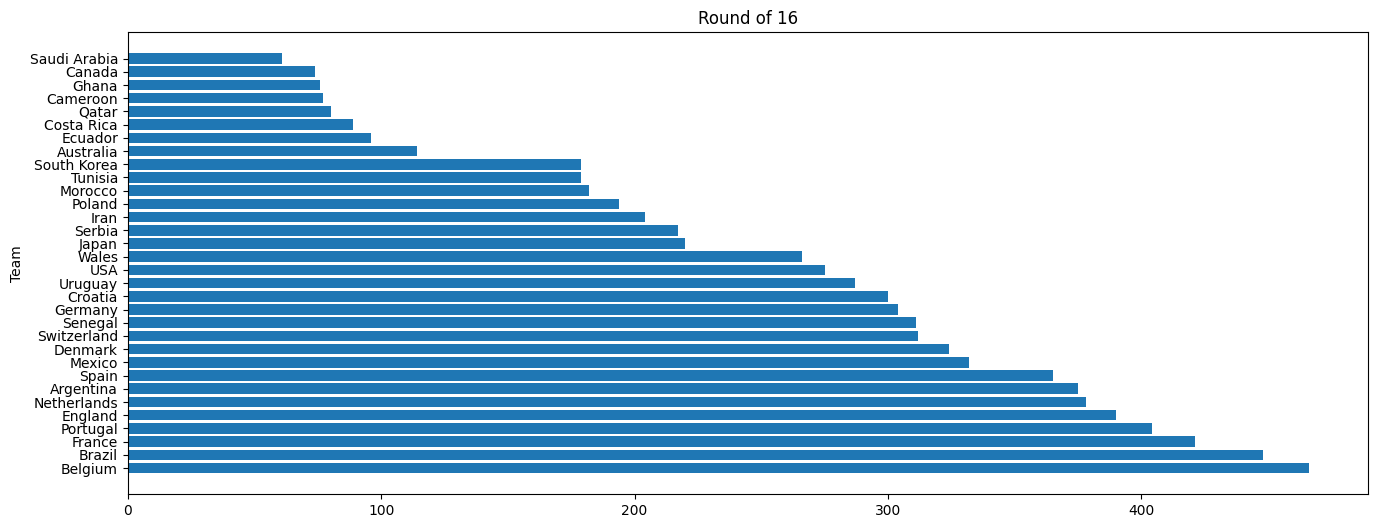

In [28]:
for i in results_real:
    results = Counter(i).most_common()
    x,y = zip(*results)

    fig,ax = plt.subplots(figsize=(16,6))

    ax.barh(x, y)

    ax.set_ylabel("Team")

    if i == results_round_of_16:
        ax.set_title("Round of 16")
        plt.show()
        break
    if i == results_quarterfinals:
        ax.set_title("Quarterfinals")
    if i == results_semifinals:
        ax.set_title("Semifinals")
    if i == results_finals:
        ax.set_title("Finals")
        
    

# G

According to the probability of Iran winning in the group stage games with regard to the results of the diagram, We can conclude below results:

Iran vs England -----> England wins

Iran vs Wales -----> Wales wins

Iran vs USA -----> USA wins